In [69]:
# the package needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error

In [70]:
# Load data and transform "weedDay" to the type of "date".
df = pd.read_csv('/content/drive/MyDrive/HW2 regression dataset.csv', parse_dates= ['weekDay'])
df.head()

,observation,weekDay,weeknumber,month,year,eq_volum,disacv_c,bonusacv,price_c,price_e,price_p,tvgrp_c,tvgrp_u,trustad,fsi_holi,fsi_non,fsi_comp,itemstor,walmart
0,1,2000-02-26,9,February,2000,3240042,9.10,0,0.90,1.05,0.67,0.0,258,0,0,0,0,9.5,0.30
1,2,2000-03-04,10,March,2000,2885233,8.17,0,0.90,1.01,0.70,0.0,183,0,0,0,0,9.5,0.31
2,3,2000-03-11,11,March,2000,2877506,6.92,0,0.91,1.04,0.73,0.0,169,0,0,0,554,9.5,0.29
3,4,2000-03-18,12,March,2000,3107180,9.10,0,0.91,0.94,0.75,0.0,7,0,0,0,0,9.5,0.30
4,5,2000-03-25,13,March,2000,2954494,7.04,0,0.90,0.95,0.75,0.0,2,0,0,0,0,9.5,0.32


In [71]:
# "weekDay" columm has included all the time informtion so we drop the rows offering duplicated information.
df.drop(columns = ['observation','weeknumber','month','year'], inplace = True)

# type transforming
df['trustad'] = df['trustad'].astype('bool')

# calculate the boundary of "Seasonality" according to "eq_volum"
watershed = (df['eq_volum'].quantile(.75) - df['eq_volum'].quantile(.25))*1.5 + df['eq_volum'].quantile(.75)
print('watershed line:' + str(watershed))
df['season'] = 0
df.loc[df.loc[:,'eq_volum'] >= watershed, 'season'] = 1

# type transforming
df['season'] = df['season'].astype('bool')
print("date type: " + str(df.dtypes))

watershed line:6221548.5
date type: weekDay     datetime64[ns]
eq_volum             int64
disacv_c           float64
bonusacv             int64
price_c            float64
price_e            float64
price_p            float64
tvgrp_c            float64
tvgrp_u              int64
trustad               bool
fsi_holi             int64
fsi_non              int64
fsi_comp             int64
itemstor           float64
walmart            float64
season                bool
dtype: object


In [72]:
# Min Max Mean SD
description = df.apply((np.min,np.max,np.mean,np.std)) 

# round to keep concise
description = round(description, 2)

# mapping index
description.index = ['min', 'max', 'mean', 'sd']

# show summary statistics
description

,weekDay,eq_volum,disacv_c,bonusacv,price_c,price_e,price_p,tvgrp_c,tvgrp_u,trustad,fsi_holi,fsi_non,fsi_comp,itemstor,walmart,season
min,2000-02-26 00:00:00,2829145.00,5.42,0.00,0.84,0.70,0.54,0.00,0.00,False,0.00,0.00,0.00,8.50,0.22,False
max,2003-07-26 00:00:00,15500000.00,33.29,69.00,0.96,1.12,0.79,346.00,398.00,True,41590.00,41676.00,92896.00,10.00,0.45,True
mean,2001-11-10 00:00:00,4430421.47,15.14,33.07,0.93,1.02,0.71,48.14,36.62,0.26257,1014.83,3216.59,7239.80,9.24,0.32,0.089385
sd,362 days 17:15:12.910310080,1982087.85,6.13,22.36,0.02,0.05,0.04,82.01,81.79,0.441265,6180.89,10883.52,17776.87,0.38,0.06,0.2861


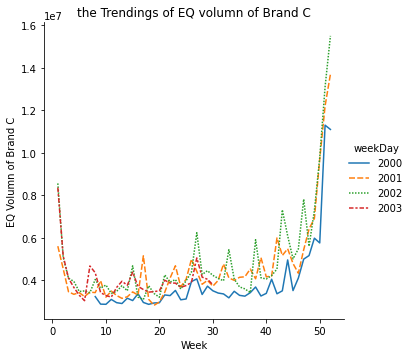

In [73]:
# Plot
df_eq_volum_trending =df.pivot_table(index =df['weekDay'].dt.year, columns = df['weekDay'].dt.isocalendar().week, values = 'eq_volum').transpose()
sns.relplot(data = df_eq_volum_trending, kind = 'line');
plt.xlabel('Week');
plt.ylabel('EQ Volumn of Brand C');
plt.title('the Trendings of EQ volumn of Brand C');

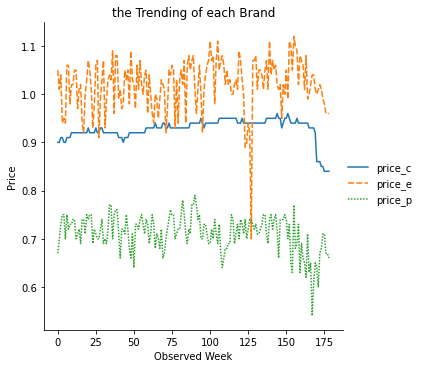

In [74]:
# Plot
sns.relplot(kind = 'line', data = df[['price_c','price_e','price_p']]);
plt.ylabel('Price');
plt.xlabel('Observed Week');
plt.title('the Trending of each Brand');

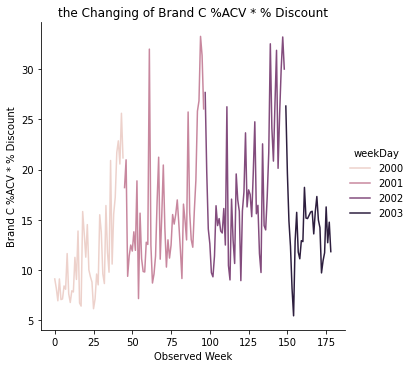

In [75]:
# Plot
sns.relplot(kind = 'line', data = df, x = df.index, y = 'disacv_c', hue = df['weekDay'].dt.year);
plt.xlabel('Observed Week');
plt.ylabel('Brand C %ACV * % Discount');
plt.title('the Changing of Brand C %ACV * % Discount');

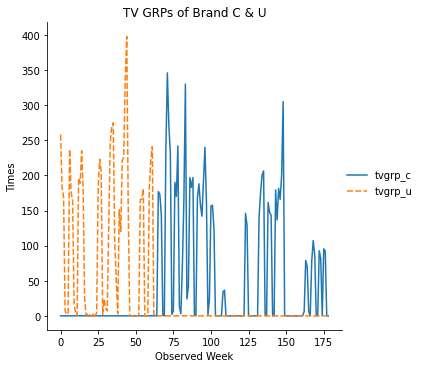

In [76]:
# Plot
sns.relplot(kind = 'line', data = df[['tvgrp_c','tvgrp_u']]);
plt.title('TV GRPs of Brand C & U');
plt.ylabel('Times');
plt.xlabel('Observed Week');

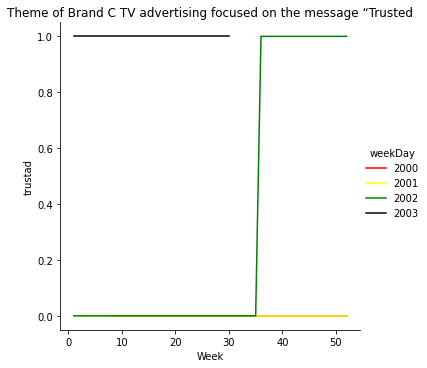

In [77]:
# Plot
sns.relplot(kind = 'line', data = df, x = df['weekDay'].dt.isocalendar().week, y = 'trustad', hue = df['weekDay'].dt.year, palette = ['red','yellow','green','black']);
plt.xlabel('Week');
plt.title('Theme of Brand C TV advertising focused on the message “Trusted');

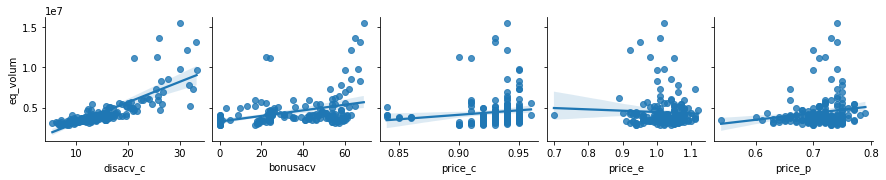

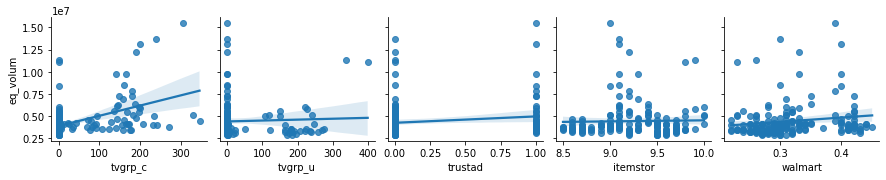

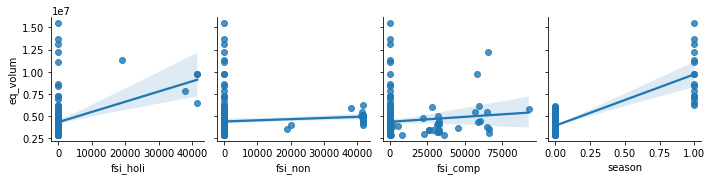

In [78]:
# X-Y plot
sns.pairplot(kind = 'reg', data = df, x_vars=['disacv_c', 'bonusacv', 'price_c','price_e','price_p'], y_vars = 'eq_volum');
sns.pairplot(kind = 'reg',data = df, x_vars=['tvgrp_c','tvgrp_u', 'trustad', 'itemstor', 'walmart'], y_vars = 'eq_volum');
sns.pairplot(kind = 'reg',data = df, x_vars=['fsi_holi','fsi_non','fsi_comp',"season"], y_vars = 'eq_volum');  

In [79]:
# Correlation between eq_volum and other variables
print(df.corr().iloc[:,0])

eq_volum    1.000000
disacv_c    0.785449
bonusacv    0.391879
price_c     0.126065
price_e    -0.044737
price_p     0.157502
tvgrp_c     0.477333
tvgrp_u     0.042259
trustad     0.160452
fsi_holi    0.359082
fsi_non     0.072088
fsi_comp    0.100522
itemstor    0.022647
walmart     0.152933
season      0.836334
Name: eq_volum, dtype: float64


In [80]:
# All the correlations
df.iloc[:,2:].corr()

,disacv_c,bonusacv,price_c,price_e,price_p,tvgrp_c,tvgrp_u,trustad,fsi_holi,fsi_non,fsi_comp,itemstor,walmart,season
disacv_c,1.000000,0.491101,0.263706,0.007074,0.069647,0.390845,-0.069687,0.203785,0.393185,0.149893,0.066665,-0.115683,0.185108,0.668881
bonusacv,0.491101,1.000000,0.459770,0.191218,-0.152847,0.286355,-0.496794,0.454275,0.171479,0.109371,-0.006840,-0.785133,0.573048,0.335398
price_c,0.263706,0.459770,1.000000,0.227181,0.170993,0.158502,-0.237166,-0.085249,0.107475,0.027626,0.078172,-0.296946,-0.055367,0.143513
price_e,0.007074,0.191218,0.227181,1.000000,-0.054021,-0.050048,0.008430,0.147507,-0.007385,0.042639,-0.062295,-0.189451,0.091299,-0.067738
price_p,0.069647,-0.152847,0.170993,-0.054021,1.000000,0.072233,0.081495,-0.328522,0.084288,-0.009813,0.212704,0.379783,-0.270693,0.132422
tvgrp_c,0.390845,0.286355,0.158502,-0.050048,0.072233,1.000000,-0.264330,0.136592,0.206919,0.158131,0.026098,-0.035409,0.168593,0.391308
tvgrp_u,-0.069687,-0.496794,-0.237166,0.008430,0.081495,-0.264330,1.000000,-0.267915,-0.002769,-0.099715,0.103113,0.459060,-0.359007,0.035791
trustad,0.203785,0.454275,-0.085249,0.147507,-0.328522,0.136592,-0.267915,1.000000,0.065455,0.062609,-0.114208,-0.484284,0.871297,0.124551
fsi_holi,0.393185,0.171479,0.107475,-0.007385,0.084288,0.206919,-0.002769,0.065455,1.000000,-0.048798,0.056946,0.033497,0.102327,0.525523
fsi_non,0.149893,0.109371,0.027626,0.042639,-0.009813,0.158131,-0.099715,0.062609,-0.048798,1.000000,-0.045158,-0.059957,0.020777,-0.017664


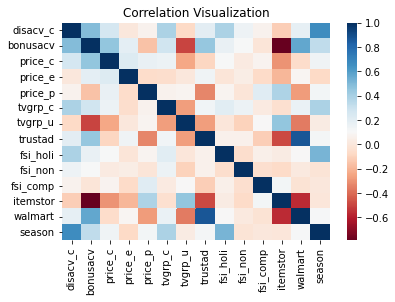

In [81]:
# Visualize the all the correlations
sns.heatmap(df.iloc[:,2:].corr(), cmap="RdBu");
plt.title('Correlation Visualization');

In [82]:
# Log-Transform
df['eq_volum'] = np.log(df['eq_volum'])

In [83]:
# Model including 10 variables
mod10 = ols('eq_volum ~ disacv_c + season + price_c + price_p + tvgrp_c + trustad + fsi_holi + fsi_non + fsi_comp + itemstor', data = df).fit()
print(mod10.summary())

                            OLS Regression Results                            
Dep. Variable:               eq_volum   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     129.6
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           1.52e-73
Time:                        05:13:57   Log-Likelihood:                 145.93
No. Observations:                 179   AIC:                            -269.9
Df Residuals:                     168   BIC:                            -234.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          14.4630      0.550     

In [84]:
# Model including 7 variables
mod7 = ols('eq_volum ~ disacv_c + season  + tvgrp_c + trustad + fsi_holi + fsi_comp + itemstor', data = df).fit()
print(mod7.summary())

                            OLS Regression Results                            
Dep. Variable:               eq_volum   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     176.9
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           7.43e-75
Time:                        05:13:57   Log-Likelihood:                 140.95
No. Observations:                 179   AIC:                            -265.9
Df Residuals:                     171   BIC:                            -240.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.7800      0.244     

        Correlation: 1.7642353623076752e-12


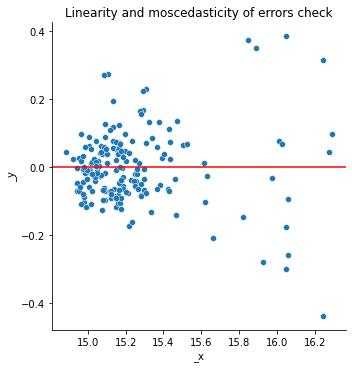

In [85]:
# Linearity and moscedasticity of errors check
sns.relplot(kind = 'scatter', data = df, \
            x = mod7.predict(df), y = mod7.resid)
plt.axhline(y=0, color='r', linestyle='-')
print("        Correlation: " \
      + str(mod7.predict(df).corr(mod7.resid)))
plt.title('Linearity and moscedasticity of errors check');

     mean: 0.0
     median: -0.01


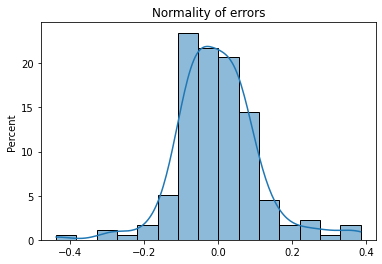

In [86]:
# Normality of errors
sns.histplot(data = mod7.resid, bins = 15, kde=True, stat = 'percent')
print('     mean: ' + str(round(mod7.resid.mean(),2)))
print('     median: ' + str(round(np.median(mod7.resid),2)))
plt.title('Normality of errors');

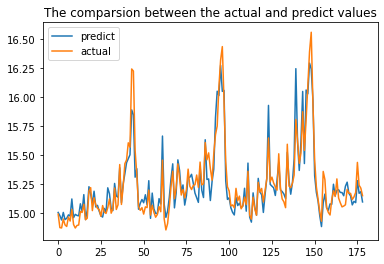

In [87]:
# The comparsion between the actual and predict values.
plt.plot(mod7.predict(df), label = 'predict');
plt.plot(df['eq_volum'], label = 'actual');
plt.legend();
plt.title('The comparsion between the actual and predict values');

In [88]:
# The model fitted from 150 rows.
mod7_150 = ols('eq_volum ~ disacv_c + season  + tvgrp_c + trustad + fsi_holi + fsi_comp + itemstor', data = df.iloc[:150,:]).fit()
print(mod7_150.summary())

                            OLS Regression Results                            
Dep. Variable:               eq_volum   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           1.05e-64
Time:                        05:13:58   Log-Likelihood:                 114.95
No. Observations:                 150   AIC:                            -213.9
Df Residuals:                     142   BIC:                            -189.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.7628      0.265     

In [90]:
 y_pre_150 = mod7_150.predict(df.iloc[:150,:])

In [91]:
#Overfitting Check
print('MSE for Train set: ' + str(mean_squared_error(df.iloc[:150,:]['eq_volum'], y_pre_150)))
print('MSE for Test set:  ' + str(mean_squared_error(df['eq_volum'].iloc[150:], mod7_150.predict(df.iloc[150:,:]))))

MSE for Train set: 0.0126448682532683
MSE for Test set:  0.012357539377568734


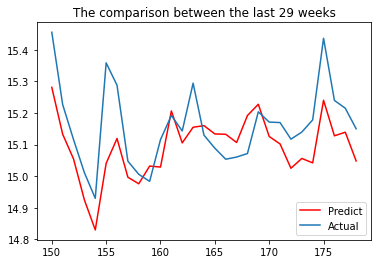

In [92]:
# The comparison between the last 29 weeks
plt.plot(mod7_150.predict(df.iloc[150:,:]), color = 'red', label = 'Predict');
plt.plot(df['eq_volum'].iloc[150:], label = 'Actual');
plt.legend();
plt.title('The comparison between the last 29 weeks');

In [93]:
pred = pd.DataFrame({'season': [1, 1],
                    'trustad':[1, 0],
                    'disacv_c':[9.2, 9.2],
                    'tvgrp_c':[0, 0],
                    'fsi_holi':[0, 0],
                    'fsi_comp':[0, 0],
                    'itemstor':[8.5, 8.5]})

In [94]:
eq_volum_pred = round(np.exp(mod7.predict(pred)),2)
eq_volum_pred.index = ['with trusted ad','without trusted ad']
print(eq_volum_pred)
print('The difference between "with trusted ad" and "without trusted ad" is {}'.format(round(eq_volum_pred[0] - eq_volum_pred[1],2)))

with trusted ad       4906161.70
without trusted ad    4671000.01
dtype: float64
The difference between "with trusted ad" and "without trusted ad" is 235161.69


In [95]:
eq_volum_pred[0]

4906161.7